In [1]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd #数据表

In [5]:
import numpy as np #数组

In [7]:
from gensim import corpora, models

In [8]:
import re #正则表达式

In [9]:
import matplotlib.pyplot as plt #画图

In [12]:
import jieba #中文分词

In [13]:
import pyLDAvis #交互化LDA可视化

In [17]:
import pyLDAvis.gensim_models as gensimvis

In [19]:
df = pd.read_excel('text_analysis_weibo_sample.xlsx', index_col=0)

In [21]:
df.head()

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东


语料预处理

In [24]:
#加载中文停用词词典 可个性化设置

In [26]:
def clean_text(text):
    #剔除数字与符号 仅保留汉字
    processed=re.sub('[^\u4e00-\u9fa5]+',' ', text)
    #分词
    words=jieba.lcut(processed)
    #剔除停用词
    stopwords=['的','了','在','和','为','也','是','我','有','就','较','这','你','我们','等','吧','们','或','都','月','年','去','不','啊','呜呜']
    words=[w for w in words if w not in stopwords]
    return ' '.join(words)

In [28]:
max_length = 100
text = df['标题/微博内容'][0]

if len(text) > max_length:
    print(text[:max_length - 3] + '...')  # 预留3个位置给省略号
else:
    print(text)

  国债：地产行业重磅利好提振风险偏好，期债低开低走     国债期货全线收跌，10年期主力合约跌0.37%，5年期主力合约跌0.24%，2年期主力合约跌0.11%，三大主力合约均创逾一年收盘新...


In [30]:
max_length = 100
text = clean_text(df['标题/微博内容'][0])

if len(text) > max_length:
    print(text[:max_length - 3] + '...')  # 预留3个位置给省略号
else:
    print(text)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/fk/9jmgcs5n4yl9cmhv3wdqb3_m0000gn/T/jieba.cache
Loading model cost 0.889 seconds.
Prefix dict has been built successfully.


  国债   地产 行业 重磅 利好 提振 风险 偏好   期债 低开 低 走   国债 期货 全线 收跌   年期 主力 合约 跌   年期 主力 合约 跌   年期 主力 合约 跌   三大...


In [31]:
df['标题/微博内容']=df['标题/微博内容'].astype(str)
df['微博内容分词']=df['标题/微博内容'].astype(str).apply(clean_text)
df['微博内容分词']=df['微博内容分词'].apply(lambda x: x.split())

In [34]:
df

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域,微博内容分词
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他,"[国债, 地产, 行业, 重磅, 利好, 提振, 风险, 偏好, 期债, 低开, 低, 走,..."
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西,"[喜迎, 二十大, 忠诚, 保平安]"
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建,"[注意, 事关, 明日, 教资, 考试, 福建省, 教育, 考试院, 发布, 补充, 公告,..."
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京,"[近日, 千年, 大计, 雄安, 新区, 迎来, 五周岁, 生日, 从, 一张白纸, 到, ..."
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东,"[樊振东, 牛, 逼]"
...,...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京,"[老公, 好, 漂亮, 舔, 屏]"
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京,"[恭喜, 张小娜, 呀, 娜, 名, 用户, 获得, 小飞, 官方, 唯一, 抽奖, 工具,..."
97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川,"[接不动, 居民, 部门, 负债率, 提升, 空间, 太, 有限, 现在, 动辄, 几万, ..."
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京,"[目前, 电子, 烟, 政策, 已, 从, 制定, 阶段, 逐渐, 走向, 实施, 阶段, ..."


LDA

In [37]:
texts=[['human','interface','computer']]

In [39]:
dictionary=corpora.Dictionary(texts) #初始化字典

In [41]:
print(dictionary.token2id)

{'computer': 0, 'human': 1, 'interface': 2}


In [43]:
print(dictionary.doc2bow(["human","interface","computer"]))

[(0, 1), (1, 1), (2, 1)]


In [45]:
dictionary.add_documents([["cat","say","meow"],["dog"]]) #add more document(拓展 vocabulary)

In [47]:
print(dictionary.token2id)
print(dictionary.doc2bow(["dog","computer","non_existent_word"]))

{'computer': 0, 'human': 1, 'interface': 2, 'cat': 3, 'meow': 4, 'say': 5, 'dog': 6}
[(0, 1), (6, 1)]


In [49]:
corpus=dictionary.doc2bow(['human','interface','computer'])#根据分词结果创建语料库

In [51]:
corpus

[(0, 1), (1, 1), (2, 1)]

In [78]:
dictionary=corpora.Dictionary(df['微博内容分词'])#根据分词结果创建字典
corpus=[dictionary.doc2bow(text)for text in df['微博内容分词']]#根据分词结果创建语料库

In [98]:
top_10 = corpus[:10]

In [100]:
#训练LDA模型
lda_model=models.LdaModel(corpus,num_topics=5,id2word=dictionary,passes=15)

In [101]:
#查看主题
topics=lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.017*"电子" + 0.016*"烟" + 0.011*"中国" + 0.009*"数字" + 0.007*"新"')
(1, '0.008*"玉米" + 0.007*"公司" + 0.006*"产品" + 0.006*"主要" + 0.005*"技术"')
(2, '0.019*"郑州" + 0.008*"亿元" + 0.007*"城市" + 0.007*"长沙" + 0.005*"青岛"')
(3, '0.009*"考生" + 0.007*"重庆" + 0.005*"考试" + 0.005*"考场" + 0.004*"亿元"')
(4, '0.012*"万吨" + 0.011*"吨" + 0.010*"元" + 0.009*"市场" + 0.007*"库存"')


In [104]:
for index, score in sorted(lda_model[corpus[0]],key=lambda tup:-1*tup[1]):
    print("\nScore:{}\t \nTopic:{}".format(score,lda_model.print_topic(index,10)))


Score:0.9993500113487244	 
Topic:0.012*"万吨" + 0.011*"吨" + 0.010*"元" + 0.009*"市场" + 0.007*"库存" + 0.007*"日" + 0.006*"需求" + 0.006*"预期" + 0.005*"下降" + 0.005*"环比"


In [106]:
def infer_topics(lda_model, document):
    bow=dictionary.doc2bow(document)
    topics=lda_model.get_document_topics(bow)
    return topics

In [108]:
#print topics for each document
documents=df["微博内容分词"].values.tolist()

In [110]:
for i, doc in enumerate(documents[:10]):
    print(doc)
    doc_topics=infer_topics(lda_model,doc)
    print(f"docunent {i+1}:")
    print(doc_topics)
    print()

['国债', '地产', '行业', '重磅', '利好', '提振', '风险', '偏好', '期债', '低开', '低', '走', '国债', '期货', '全线', '收跌', '年期', '主力', '合约', '跌', '年期', '主力', '合约', '跌', '年期', '主力', '合约', '跌', '三大', '主力', '合约', '均', '创', '逾', '一年', '收盘', '新低', '行情', '解读', '公开市场', '方面', '央行', '开展', '亿元', '天期', '逆', '回购', '操作', '中标', '利率', '亿元', '逆', '回购', '到期', '因此', '当日', '净', '投放', '亿元', '资金面', '方面', '央行', '公开市场', '逆', '回购', '继续', '加力', '不过', '银行', '间', '市场', '周二', '资金', '供给', '趋于', '收敛', '七天', '回购', '加权', '利率', '进一步', '上行', '长期', '资金', '方面', '全国', '主要', '股份制', '银行', '一年期', '同业', '存单', '报价', '仍', '维持', '水平', '不过', '目前', '尚无', '成交量', '配合', '房地产', '行业', '再度', '迎来', '重磅', '利好', '证监会', '宣布', '涉房', '企业', '股权', '融资', '方面', '调整', '优化', '五项', '措施', '并', '自即日起', '施行', '随着', '证监会', '支持', '房企', '股权', '融资', '第三支', '箭', '正式', '发射', '信贷', '债券', '股权', '三个', '融资', '渠道', '三箭', '齐发', '合力', '推动', '房地产', '融资', '第三支', '箭', '快速', '落地', '将', '房地产', '行业', '注入', '大规模', '增量', '资金', '资产', '促进', '行业', '平稳', '健康', '发展', '短短', '天', '时间', '内', '政策', '端', '三箭',

In [112]:
#上述语句如果在数据量比较大的时候跑不出来，可以选择加一个n_jobs=1的参数，降低计算量，避免报错
lda_vis=gensimvis.prepare(lda_model,corpus,dictionary)

In [113]:
#显示可视化界面
pyLDAvis.display(lda_vis)

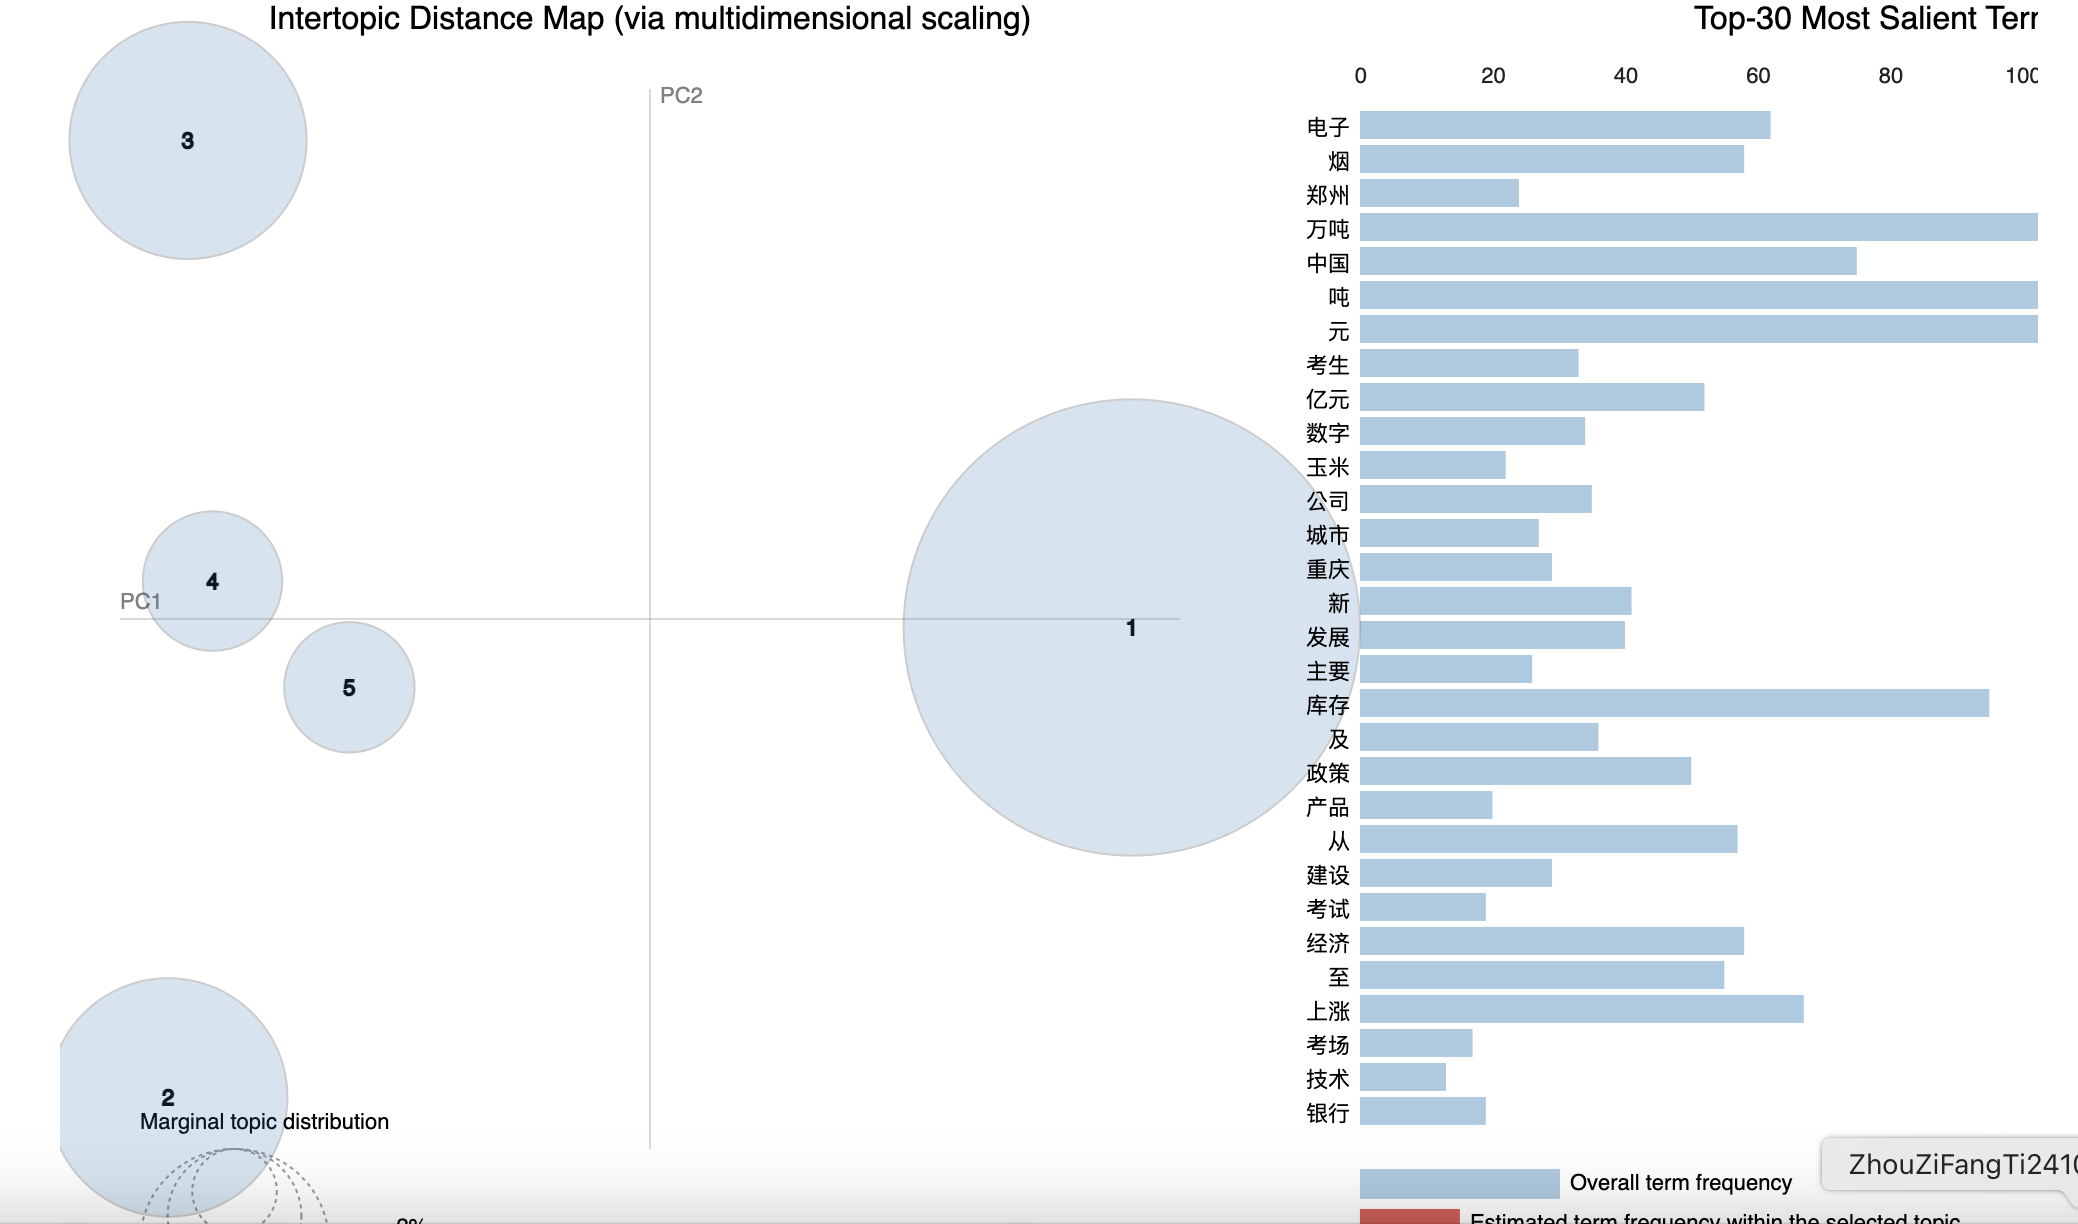